In [8]:
import pandas as pd
import geopandas as gpd
import matplotlib as plt

In [6]:
tract00 = gpd.read_file("tl_2010_36_tract00/tl_2010_36_tract00.shp")

In [7]:
tract10 = gpd.read_file("tl_2010_36_tract10/tl_2010_36_tract10.shp")

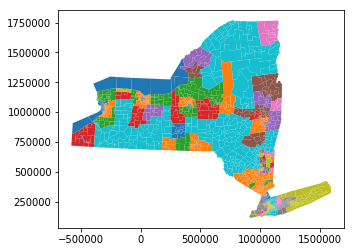

In [31]:
tract00.plot(column='TRACTCE00')

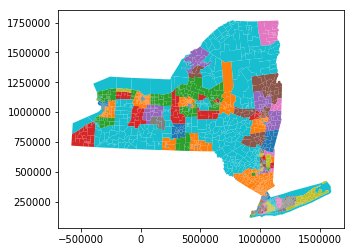

In [32]:
tract10.plot(column='TRACTCE10')

In [26]:
print(tract00.head())
print(tract00.shape)

  STATEFP00 COUNTYFP00 TRACTCE00     CTIDFP00  NAME00           NAMELSAD00  \
0        36        013    036700  36013036700     367     Census Tract 367   
1        36        101    963000  36101963000    9630    Census Tract 9630   
2        36        099    950400  36099950400    9504    Census Tract 9504   
3        36        099    950600  36099950600    9506    Census Tract 9506   
4        36        093    032601  36093032601  326.01  Census Tract 326.01   

  MTFCC00 FUNCSTAT00    ALAND00  AWATER00   INTPTLAT00    INTPTLON00  \
0   G5020          S  281254093    629318  +42.0657319  -079.6209936   
1   G5020          S  194675510   1826066  +42.0555403  -077.0720690   
2   G5020          S   24428058    392454  +42.9162138  -076.8301158   
3   G5020          S   32772250    336172  +42.9041081  -076.9390533   
4   G5020          S    5966503     29451  +42.7796729  -074.0179636   

                                            geometry  
0  POLYGON ((-580951.6684090073 719069.2876

In [27]:
print(tract10.head())
print(tract10.shape)

  STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10         NAMELSAD10  \
0        36        099    951000  36099951000   9510  Census Tract 9510   
1        36        099    950700  36099950700   9507  Census Tract 9507   
2        36        099    950500  36099950500   9505  Census Tract 9505   
3        36        099    950100  36099950100   9501  Census Tract 9501   
4        36        099    950900  36099950900   9509  Census Tract 9509   

  MTFCC10 FUNCSTAT10    ALAND10  AWATER10   INTPTLAT10    INTPTLON10  \
0   G5020          S   81287303  16045715  +42.5844045  -076.6966089   
1   G5020          S  142019951  34216025  +42.8428740  -076.8585501   
2   G5020          S   23348189     45010  +42.9303542  -076.8789131   
3   G5020          S  147014747   8301583  +42.9849056  -076.8452011   
4   G5020          S  168477163  34879017  +42.6232947  -076.8139114   

                                            geometry  
0  POLYGON ((250271.2375244494 878492.9829983364,...  
1  POL

### Spatial Join

In [17]:
tract10.crs

{'init': 'epsg:4269'}

In [18]:
tract00.crs

{'init': 'epsg:4269'}

In [19]:
from fiona.crs import from_epsg

In [30]:
tract10.to_crs(epsg=2263,inplace=True)
tract00.to_crs(epsg=2263,inplace=True)

In [21]:
tract = gpd.tools.sjoin(tract10, tract00, how="left")

In [33]:
print(tract.head())
print(tract.shape)

  STATEFP10 COUNTYFP10 TRACTCE10      GEOID10 NAME10         NAMELSAD10  \
0        36        099    951000  36099951000   9510  Census Tract 9510   
0        36        099    951000  36099951000   9510  Census Tract 9510   
0        36        099    951000  36099951000   9510  Census Tract 9510   
0        36        099    951000  36099951000   9510  Census Tract 9510   
0        36        099    951000  36099951000   9510  Census Tract 9510   

  MTFCC10 FUNCSTAT10   ALAND10  AWATER10      ...      TRACTCE00     CTIDFP00  \
0   G5020          S  81287303  16045715      ...         041000  36011041000   
0   G5020          S  81287303  16045715      ...         950100  36097950100   
0   G5020          S  81287303  16045715      ...         001600  36109001600   
0   G5020          S  81287303  16045715      ...         002300  36109002300   
0   G5020          S  81287303  16045715      ...         951000  36099951000   

  NAME00         NAMELSAD00 MTFCC00 FUNCSTAT00    ALAND00  AWA

In [29]:
print(tract.shape)

(34890, 26)


## Brown U LTDB

In [209]:
tract00_fullcount = pd.read_csv('LTDB_Std_2000_fullcount.csv')

In [210]:
print(tract00_fullcount.columns)
print(tract00_fullcount.shape)

Index(['TRTID10', 'state', 'county', 'tract', 'placefp10', 'cbsa10',
       'metdiv10', 'ccflag10', 'POP00', 'NHWHT00', 'NHBLK00', 'NTV00',
       'ASIAN00', 'HISP00', 'HAW00', 'INDIA00', 'CHINA00', 'FILIP00',
       'JAPAN00', 'KOREA00', 'VIET00', 'MEX00', 'PR00', 'CUBAN00', 'HU00',
       'VAC00', 'OHU00', 'A18UND00', 'A60UP00', 'A75UP00', 'AGEWHT00',
       'A15WHT00', 'A60WHT00', 'AGEBLK00', 'A15BLK00', 'A60BLK00', 'AGEHSP00',
       'A15HSP00', 'A60HSP00', 'AGENTV00', 'A15NTV00', 'A60NTV00', 'AGEASN00',
       'A15ASN00', 'A60ASN00', 'FAMILY00', 'FHH00', 'OWN00', 'RENT00',
       'GlobD00', 'GlobG00'],
      dtype='object')
(72693, 51)


In [211]:
tract00_samplecount = pd.read_csv('LTDB_Std_2000_Sample2.csv')

In [212]:
print(tract00_samplecount.columns)
print(tract00_samplecount.shape)

Index(['TRTID10', 'state', 'county', 'tract', 'placefp10', 'cbsa10',
       'metdiv10', 'ccflag10', 'POP00SF3', 'RUANC00', 'ITANC00', 'GEANC00',
       'IRANC00', 'SCANC00', 'RUFB00', 'ITFB00', 'GEFB00', 'IRFB00', 'SCFB00',
       'FB00', 'NAT00', 'N10IMM00', 'AG5UP00', 'OLANG00', 'LEP00', 'AG25UP00',
       'HS00', 'COL00', 'AG15UP00', 'Mar-00', 'WDS00', 'CLF00', 'UNEMP00',
       'DFLABF00', 'FLABF00', 'EMPCLF00', 'PROF00', 'MANUF00', 'SEMP00',
       'AG18CV00', 'VET00', 'CNI16U00', 'DIS00', 'DPOV00', 'NPOV00',
       'N65POV00', 'DFMPOV00', 'NFMPOV00', 'DWPOV00', 'NWPOV00', 'DBPOV00',
       'NBPOV00', 'DNAPOV00', 'NNAPOV00', 'DHPOV00', 'NHPOV00', 'DAPOV00',
       'NAPOV00', 'INCPC00', 'HU00SP', 'H30OLD00', 'OHU00SP', 'H10YRS00',
       'DMULTI00', 'MULTI00', 'HINC00', 'HINCW00', 'HINCB00', 'HINCH00',
       'HINCA00', 'MHMVAL00', 'MRENT00', 'HH00', 'HHW00', 'HHB00', 'HHH00',
       'HHA00'],
      dtype='object')
(72693, 77)


In [226]:
state = ['CT']
tract00_samplecount_CT = tract00_samplecount[tract00_samplecount['state'].isin(state)]
tract00_fullcount_CT = tract00_fullcount[tract00_fullcount['state'].isin(state)]

In [227]:
tract00_samplecount_CT['geoid'] = tract00_samplecount_CT['TRTID10'].apply(lambda x: '0' + str(x))
tract00_fullcount_CT['geoid'] = tract00_fullcount_CT['TRTID10'].apply(lambda x: '0' + str(x))

/Users/mkm/anaconda3/envs/Pyhton37/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mkm/anaconda3/envs/Pyhton37/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [228]:
state = ['NY','NJ']
tract00_samplecount_temp = tract00_samplecount[tract00_samplecount['state'].isin(state)]
tract00_fullcount_temp = tract00_fullcount[tract00_fullcount['state'].isin(state)]

In [229]:
tract00_samplecount_temp['geoid'] = tract00_samplecount['TRTID10'].apply(lambda x: str(x))
tract00_fullcount_temp['geoid'] = tract00_fullcount['TRTID10'].apply(lambda x: str(x))

/Users/mkm/anaconda3/envs/Pyhton37/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mkm/anaconda3/envs/Pyhton37/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [235]:
tract00_samplecount = pd.concat([tract00_samplecount_temp,tract00_samplecount_CT])
tract00_fullcount = pd.concat([tract00_fullcount_temp,tract00_fullcount_CT])

In [120]:
# tract00_samplecount['tractce'] = tract00_samplecount['TRTID10'].apply(lambda x: '0' + str(x)[-6:])
# tract00_samplecount['tractce'] = tract00_samplecount['tractce'].astype(int)

In [121]:
# tract00_fullcount['tractce'] = tract00_fullcount['TRTID10'].apply(lambda x: str(x)[-6:])
# tract00_fullcount['tractce'] = tract00_fullcount['tractce'].astype(int)

In [236]:
print(tract00_samplecount.shape)
print(tract00_fullcount.shape)

(7715, 78)
(7715, 52)


## Import Study Area Census Tract

In [237]:
region = gpd.read_file("Censustracts/region.shp")

,aland_mi,objectid,statefp,countyfp,tractce,geoid,name,namelsad,mtfcc,funcstat,...,hour16moe,hour16cv,emtot15,empr15,emoff15,emins15,emind15,emser15,emoth15,geometry
0,10.14335,17,34,013,021601,34013021601,216.01,Census Tract 216.01,G5020,S,...,109.0,25.583551,22750.0,22492.0,7641.0,1229.0,10729.0,2162.0,731.0,"POLYGON ((-74.3228040001045 40.90883400018899,..."
1,3.16034,27,34,003,031100,34003031100,311,Census Tract 311,G5020,S,...,214.0,10.602379,8274.0,8172.0,3602.0,219.0,3181.0,1084.0,86.0,POLYGON ((-74.08304199968846 40.78623200040653...
2,1.84139,50,34,003,036200,34003036200,362,Census Tract 362,G5020,S,...,75.0,19.156599,8825.0,8224.0,1252.0,217.0,5718.0,975.0,62.0,POLYGON ((-74.03536299980257 40.82861799992076...
3,0.03451,95,34,017,003500,34017003500,35,Census Tract 35,G5020,S,...,67.0,6.133958,58.0,58.0,33.0,7.0,4.0,14.0,0.0,POLYGON ((-74.04668899959766 40.72066899957468...
4,0.11672,108,34,017,015500,34017015500,155,Census Tract 155,G5020,S,...,137.0,6.123726,676.0,620.0,82.0,106.0,84.0,321.0,27.0,POLYGON ((-74.01458600034361 40.79119299985706...


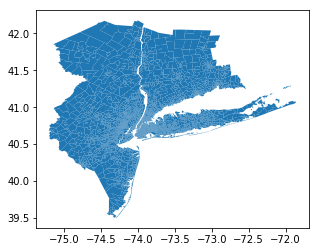

In [238]:
region.plot()
region.head()

In [239]:
region['area']  = region.geometry.area

In [240]:
tract_area = region['geoid']

In [241]:
tract00_samplecount = tract00_samplecount[tract00_samplecount['geoid'].isin(tract_area)]
tract00_fullcount = tract00_fullcount[tract00_fullcount['geoid'].isin(tract_area)]

In [242]:
print(tract00_samplecount.shape)
print(tract00_fullcount.shape)

(5276, 78)
(5276, 52)


In [245]:
#get area for density
tract00_samplecount = tract00_samplecount.merge(region)
tract00_fullcount = tract00_fullcount.merge(region)

In [251]:
tract00_samplecount.drop(columns={'aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'}, inplace=True)

In [253]:
tract00_fullcount.drop(columns={'aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'}, inplace=True)

In [254]:
print(tract00_samplecount.shape)
print(tract00_fullcount.shape)

(5276, 78)
(5276, 52)


In [158]:
# tract00_samplecount.to_csv('tract00_samplecount.csv')
# tract00_fullcount.to_csv('tract00_fullcount.csv')

## Extract Features
- carcommuters_00, hinc00 (also consider including hinc00 squared), medhval00, medrent00, per_rent_00, percol00, pernwh00, POP00
- TOD 
- percent Latino, African-American, and Asian (instead of nonwhite); population and employment density; percent of houses built before 1950 (I think this is in the dataset already -- check), and percent of housing units built in the decade before your dependent (i.e., 1990-2000).

In [164]:
tract00_fullcount.columns

Index(['TRTID10', 'state', 'county', 'tract', 'placefp10', 'cbsa10',
       'metdiv10', 'ccflag10', 'POP00', 'NHWHT00', 'NHBLK00', 'NTV00',
       'ASIAN00', 'HISP00', 'HAW00', 'INDIA00', 'CHINA00', 'FILIP00',
       'JAPAN00', 'KOREA00', 'VIET00', 'MEX00', 'PR00', 'CUBAN00', 'HU00',
       'VAC00', 'OHU00', 'A18UND00', 'A60UP00', 'A75UP00', 'AGEWHT00',
       'A15WHT00', 'A60WHT00', 'AGEBLK00', 'A15BLK00', 'A60BLK00', 'AGEHSP00',
       'A15HSP00', 'A60HSP00', 'AGENTV00', 'A15NTV00', 'A60NTV00', 'AGEASN00',
       'A15ASN00', 'A60ASN00', 'FAMILY00', 'FHH00', 'OWN00', 'RENT00',
       'GlobD00', 'GlobG00', 'geoid'],
      dtype='object')

In [165]:
tract00_samplecount.columns

Index(['TRTID10', 'state', 'county', 'tract', 'placefp10', 'cbsa10',
       'metdiv10', 'ccflag10', 'POP00SF3', 'RUANC00', 'ITANC00', 'GEANC00',
       'IRANC00', 'SCANC00', 'RUFB00', 'ITFB00', 'GEFB00', 'IRFB00', 'SCFB00',
       'FB00', 'NAT00', 'N10IMM00', 'AG5UP00', 'OLANG00', 'LEP00', 'AG25UP00',
       'HS00', 'COL00', 'AG15UP00', 'Mar-00', 'WDS00', 'CLF00', 'UNEMP00',
       'DFLABF00', 'FLABF00', 'EMPCLF00', 'PROF00', 'MANUF00', 'SEMP00',
       'AG18CV00', 'VET00', 'CNI16U00', 'DIS00', 'DPOV00', 'NPOV00',
       'N65POV00', 'DFMPOV00', 'NFMPOV00', 'DWPOV00', 'NWPOV00', 'DBPOV00',
       'NBPOV00', 'DNAPOV00', 'NNAPOV00', 'DHPOV00', 'NHPOV00', 'DAPOV00',
       'NAPOV00', 'INCPC00', 'HU00SP', 'H30OLD00', 'OHU00SP', 'H10YRS00',
       'DMULTI00', 'MULTI00', 'HINC00', 'HINCW00', 'HINCB00', 'HINCH00',
       'HINCA00', 'MHMVAL00', 'MRENT00', 'HH00', 'HHW00', 'HHB00', 'HHH00',
       'HHA00', 'geoid'],
      dtype='object')

In [258]:
tract00_feature = pd.DataFrame()

In [259]:
tract00_feature['pop00'] = tract00_fullcount['POP00']
tract00_feature['phisp00'] = tract00_fullcount['HISP00'] / tract00_fullcount['POP00']
tract00_feature['pnhblk00'] = tract00_fullcount['NHBLK00'] / tract00_fullcount['POP00']
tract00_feature['pasian00'] = tract00_fullcount['ASIAN00'] / tract00_fullcount['POP00']
tract00_feature['popden00'] = tract00_fullcount['POP00'] / tract00_fullcount['area']

In [260]:
tract00_feature['unempden00'] = tract00_samplecount['UNEMP00'] / tract00_samplecount['area']
tract00_feature['hinc00'] = tract00_samplecount['HINC00']
tract00_feature['mrent00'] = tract00_samplecount['MRENT00']
tract00_feature['pag25up00'] = tract00_samplecount['AG25UP00'] / tract00_samplecount['POP00SF3']

In [262]:
print (tract00_feature.head())
print(tract00_feature.shape)

         pop00   phisp00  pnhblk00  pasian00      popden00     unempden00  \
0  6683.181012  0.025387  0.004034  0.065236  7.729906e+06   96913.273415   
1  2183.000000  0.025195  0.016949  0.199267  1.230491e+06   15219.084062   
2  4851.000000  0.047413  0.011544  0.135436  7.683608e+06   90283.578641   
3  5751.000000  0.029908  0.012172  0.195097  7.426918e+06  139472.644748   
4  5057.000000  0.161360  0.051414  0.210995  3.804465e+07  857640.815224   

        hinc00      mrent00  pag25up00  
0  105711.9486  1599.289479   0.653295  
1       130740         1597   0.700870  
2        74423          791   0.714698  
3        92447          966   0.678143  
4        65750          908   0.698438  
(5276, 9)


In [264]:
tract00_feature.to_csv('tract00_feature.csv')